In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change this according to the path in your drive?
data = "/content/drive/MyDrive/Major Project/data/central_data"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv(os.path.join(data, "full_combined.csv"))
df.shape

(475, 28)

In [5]:
df.drop(["Entity", "Unnamed: 0"], axis=1, inplace=True)

In [6]:
df["total_vaccinations"].fillna(0, inplace=True)
df["people_vaccinated"].fillna(0, inplace=True)
df["people_fully_vaccinated"].fillna(0, inplace=True)

In [7]:
df.tail()

,Day,public_information_campaigns,stay_home_requirements,close_public_transport,cancel_public_events,testing_policy,stringency_index,vaccination_policy,facial_coverings,total_vaccinations,people_vaccinated,people_fully_vaccinated,mobility_driving,mobility_walking,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117223509.0,102349255.0,14874254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119937641.0,104408484.0,15529157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122622590.0,106431076.0,16191514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123852566.0,107371770.0,16480796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127129113.0,109659181.0,17469932.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop(index=list(range(0, 12)), inplace=True)

In [9]:
df["Daily Confirmed"].fillna(0, inplace=True)
df["Total Confirmed"].fillna(0, inplace=True)
df["Daily Recovered"].fillna(0, inplace=True)
df["Total Recovered"].fillna(0, inplace=True)
df["Daily Deceased"].fillna(0, inplace=True)
df["Total Deceased"].fillna(0, inplace=True)

In [10]:
df.isna().sum()

Day                              7
public_information_campaigns     7
stay_home_requirements           7
close_public_transport           7
cancel_public_events             7
testing_policy                   7
stringency_index                15
vaccination_policy               7
facial_coverings                 7
total_vaccinations               0
people_vaccinated                0
people_fully_vaccinated          0
mobility_driving                10
mobility_walking                10
retail_and_recreation           42
grocery_and_pharmacy            42
residential                     42
transit_stations                42
parks                           42
workplaces                      42
Daily Confirmed                  0
Total Confirmed                  0
Daily Recovered                  0
Total Recovered                  0
Daily Deceased                   0
Total Deceased                   0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 12 to 474
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Day                           456 non-null    object 
 1   public_information_campaigns  456 non-null    float64
 2   stay_home_requirements        456 non-null    float64
 3   close_public_transport        456 non-null    float64
 4   cancel_public_events          456 non-null    float64
 5   testing_policy                456 non-null    float64
 6   stringency_index              448 non-null    float64
 7   vaccination_policy            456 non-null    float64
 8   facial_coverings              456 non-null    float64
 9   total_vaccinations            463 non-null    float64
 10  people_vaccinated             463 non-null    float64
 11  people_fully_vaccinated       463 non-null    float64
 12  mobility_driving              453 non-null    float64
 13  mobi

In [12]:
df["stringency_index"].fillna(0, inplace=True)
df["mobility_driving"].fillna(df["mobility_driving"].mean(), inplace=True)
df["mobility_walking"].fillna(df["mobility_walking"].mean(), inplace=True)
df["mobility_driving"] = df["mobility_driving"]-100
df["mobility_walking"] = df["mobility_walking"]-100

In [13]:
df[df["retail_and_recreation"].isna()]

,Day,public_information_campaigns,stay_home_requirements,close_public_transport,cancel_public_events,testing_policy,stringency_index,vaccination_policy,facial_coverings,total_vaccinations,people_vaccinated,people_fully_vaccinated,mobility_driving,mobility_walking,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
12,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
13,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.350000,-0.820000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
14,2020-01-15,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,7.960000,4.080000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
15,2020-01-16,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,10.770000,7.410000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
16,2020-01-17,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,20.640000,13.910000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
17,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,36.840000,28.020000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
18,2020-01-19,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,22.400000,13.390000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
19,2020-01-20,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,6.830000,7.910000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
20,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.750000,4.550000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
21,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.080000,5.830000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.drop(list(range(468, 475)), inplace=True)

In [15]:
for col in ['retail_and_recreation',
       'grocery_and_pharmacy', 'residential', 'transit_stations', 'parks',
       'workplaces']:
       df[col].fillna(df[col].mean(), inplace=True)

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.head(10)

,Day,public_information_campaigns,stay_home_requirements,close_public_transport,cancel_public_events,testing_policy,stringency_index,vaccination_policy,facial_coverings,total_vaccinations,people_vaccinated,people_fully_vaccinated,mobility_driving,mobility_walking,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.35,-0.82,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.96,4.08,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.77,7.41,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.64,13.91,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.84,28.02,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.40,13.39,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.83,7.91,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
8,2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.75,4.55,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0
9,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.08,5.83,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.describe()

,public_information_campaigns,stay_home_requirements,close_public_transport,cancel_public_events,testing_policy,stringency_index,vaccination_policy,facial_coverings,total_vaccinations,people_vaccinated,people_fully_vaccinated,mobility_driving,mobility_walking,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,4.560000e+02,4.560000e+02,4.560000e+02,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,4.560000e+02,456.000000,4.560000e+02,456.000000,456.000000
mean,1.859649,2.083333,0.918860,1.752193,2.116228,65.205526,0.502193,3.252193,5.474723e+06,4.720202e+06,7.545215e+05,-1.487572,-2.140199,-41.190881,-3.744618,13.019121,-27.015608,-33.823335,-26.076095,30013.451754,4.889461e+06,26864.677632,4.494799e+06,373.899123,72532.057018
std,0.416731,0.702950,0.732297,0.644500,0.768672,24.205176,1.081308,1.546352,1.734611e+07,1.495728e+07,2.420589e+06,44.145138,43.402150,21.666536,19.364295,6.524243,19.450961,19.185333,14.990216,31337.767041,4.733784e+06,27305.406031,4.554144e+06,362.944464,65476.547370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-83.700000,-77.180000,-85.857000,-64.143000,0.000000,-73.000000,-63.714000,-65.857000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,0.000000,2.000000,2.000000,61.570000,0.000000,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,-37.862500,-40.407500,-58.286000,-9.357250,9.714000,-39.286000,-51.000000,-30.857000,3298.000000,5.210650e+04,1148.500000,1.501075e+04,80.250000,1762.250000
50%,2.000000,2.000000,1.000000,2.000000,2.000000,68.980000,0.000000,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.240000,3.890000,-39.357500,-0.785500,12.286000,-26.071500,-37.571000,-24.571000,18255.500000,3.422918e+06,17215.500000,2.615294e+06,263.000000,62216.500000
75%,2.000000,3.000000,1.000000,2.000000,3.000000,79.170000,0.000000,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,33.750000,33.047500,-26.429000,9.429000,14.857000,-9.678250,-14.571000,-16.857000,48795.750000,1.003774e+07,46027.750000,9.585948e+06,582.000000,145005.000000
max,2.000000,3.000000,2.000000,2.000000,3.000000,100.000000,4.000000,4.000000,1.085331e+08,9.504304e+07,1.349005e+07,94.560000,90.130000,0.667000,21.429000,29.143000,2.333000,3.714000,5.571000,169914.000000,1.368613e+07,102070.000000,1.225029e+07,2004.000000,170498.000000


In [19]:
df[df.Day.isna()]

,Day,public_information_campaigns,stay_home_requirements,close_public_transport,cancel_public_events,testing_policy,stringency_index,vaccination_policy,facial_coverings,total_vaccinations,people_vaccinated,people_fully_vaccinated,mobility_driving,mobility_walking,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [20]:
df.to_csv(os.path.join(data, "cleaned.csv"), index=False)

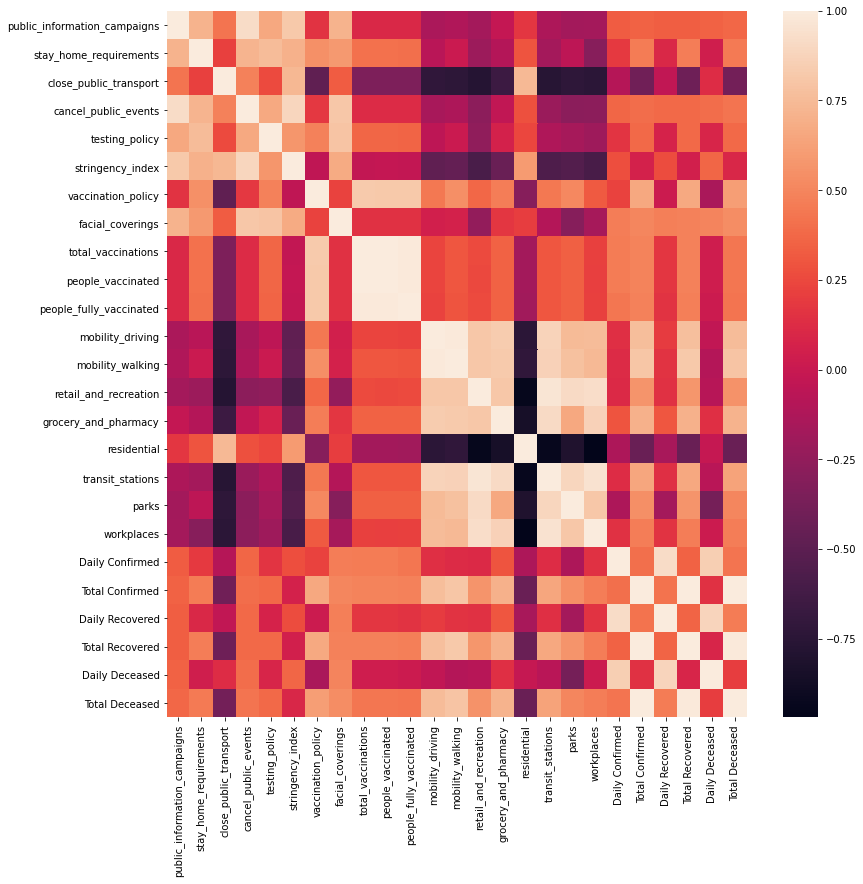

In [21]:
corr = df.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr)

In [22]:
df.loc[df["Day"]=='2021-02-14', "total_vaccinations"]=8052454 # missing data set to previous
df.loc[df["Day"]=='2021-02-14',"people_vaccinated"]=8044786
df.loc[df["Day"]=='2021-02-14',"people_fully_vaccinated"]=7668

In [23]:
df["Day"] = pd.to_datetime(df["Day"])

In [24]:
df.tail()

,Day,public_information_campaigns,stay_home_requirements,close_public_transport,cancel_public_events,testing_policy,stringency_index,vaccination_policy,facial_coverings,total_vaccinations,people_vaccinated,people_fully_vaccinated,mobility_driving,mobility_walking,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
451,2021-04-08,2.0,3.0,0.0,2.0,3.0,69.91,4.0,4.0,94334262.0,82456522.0,11877740.0,12.65,26.75,-25.000,19.857,10.429,-9.571,-13.714,-17.714,131878.0,13057872.0,61829.0,11910576.0,802.0,167103.0
452,2021-04-09,2.0,3.0,0.0,2.0,3.0,69.91,4.0,4.0,98075160.0,85763852.0,12311308.0,20.66,26.79,-25.286,19.857,10.286,-9.429,-14.286,-16.000,144945.0,13202817.0,77263.0,11987839.0,773.0,167876.0
453,2021-04-10,2.0,3.0,0.0,2.0,3.0,69.91,4.0,4.0,101595147.0,88885961.0,12709186.0,22.09,23.81,-26.857,17.714,11.143,-11.571,-15.857,-18.143,152565.0,13355382.0,90328.0,12078167.0,838.0,168714.0
454,2021-04-11,2.0,3.0,0.0,2.0,3.0,69.91,4.0,4.0,104528565.0,91587400.0,12941165.0,15.32,22.70,-28.000,16.429,11.714,-13.286,-17.286,-19.000,169914.0,13525296.0,75380.0,12153547.0,904.0,169618.0
455,2021-04-12,2.0,3.0,0.0,2.0,3.0,69.91,4.0,4.0,108533085.0,95043039.0,13490046.0,3.17,16.28,-28.429,17.000,12.000,-13.857,-17.857,-19.429,160838.0,13686134.0,96746.0,12250293.0,880.0,170498.0


In [25]:
df.shape

(456, 26)

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(35,25))
for i in range(5):
  for j in range(5):
    if df.iloc[:, i*5+j].dtype!='float64':
      continue
    axes[i,j].plot(df.iloc[:, i*5+j])
    axes[i,j].set_title(df.columns[i*5+j])

In [ ]:
df = df.set_index("Day")

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df['Daily Confirmed'][:400], label="First wave")
plt.plot(df['Daily Confirmed'][399:], label="Second Wave")

plt.legend()
plt.show()

In [ ]:
df["dp"].tail()

In [ ]:
plt.figure(figsize=(15,8))
# from sklearn.preprocessing import MinMaxScaler
# sc=MinMaxScaler(feature_range=(0,100))
df["custom"] = df["Total Recovered"]+df["Total Deceased"]
df["rp"] = df["Total Recovered"]*100/df["custom"]
df["dp"] = df["Total Deceased"]*100/df["custom"]
# dr = sc.transform(df["dp"].values.reshape(-1,1))
# dd = sc.transform(df["rp"].values.reshape(-1,1))
plt.plot(df["dp"], label='Deceased')
plt.plot(df["rp"], label="Recovered")
plt.legend()

In [ ]:
dd

In [ ]:

from statsmodels.tsa.arima_model import ARIMA
import datetime

arima = ARIMA(dc, order=(5,1,0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])

start_date =days.max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (15,10))
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Predicted Values for the next 15 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = '#ff9999',label = 'Predicted');
plt.plot_date(y=df['Daily Confirmed'][400:],x=df['Day'][400:],linestyle = '-',color = 'blue',label = 'Actual');
plt.legend();

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

data = pd.DataFrame(columns = ['ds','y'])
data['ds'] = days
data['y'] = dc

prop=Prophet()
prop.fit(data)
future=prop.make_future_dataframe(periods=30)
prop_forecast=prop.predict(future)
forecast = prop_forecast[['ds','yhat']].tail(30)

fig = plot_plotly(prop, prop_forecast)
fig = prop.plot(prop_forecast,xlabel='Date',ylabel='Confirmed Cases')